# Lottery Numbers Analysis 

## Introduction

The main idea of this project is to perform an analysis of all winning numbers in Lotto Max by creating visual representations suchs as heat maps, dispertion graphs, histograms, among others.

After the analysis stage, the second objective is to perfom an approach similar to a Travelling salesman problem, by choosing numbers with the higher probability to be the consecutive while choosing.

## Importing data from source

The data comes from [Lottery Guru](https://lotteryguru.com/canada-lottery-results/ca-lotto-max/ca-lotto-max-results-history). All data is copy and paste into a .txt file manually with outformat.

In [76]:
# Export data from .txt file
import pandas as pd

src_file = 'LottoMax_history_log.txt'
data = []

with open(src_file,'r') as f:
    for line in f:
       data.append(line)

header = ['Day','Date','1','2','3','4','5','6','7','Bonus','Jackpot','Price']
table = []
for i in data:
    lines = []
    for j in range(12):
        x = data.pop(0)
        x = x.replace('\n','')
        lines.append(x)
    for i in range(len(lines)):
        if i>1 and i<10:
            lines[i] = int(lines[i])
        else:
            lines[i] = str(lines[i])
    s = lines[-1]
    s=s.replace('$','')
    s=s.replace(',','')
    lines[-1]=float(s)
    table.append(lines)

    # test = s.find('.')
    
    # if test==-1:
    #     lines[-1]=int(s)
    #     table.append(lines)
    # else:
    #     temp = s.split('.')
    #     s = temp[0]
    #     lines[-1]=(s)
    #     table.append(lines)


df = pd.DataFrame(table,columns=[header]).drop(columns=['Jackpot'])
df



c:\Users\ACER\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Day,Date,1,2,3,4,5,6,7,Bonus,Price
0,Tuesday,26 Jul 2022,3,8,9,15,21,27,31,33,30516060.8
1,Friday,22 Jul 2022,1,9,19,34,37,39,49,6,25000000.0
2,Tuesday,19 Jul 2022,6,9,17,19,31,34,46,4,20000000.0
3,Friday,15 Jul 2022,4,7,12,18,29,47,49,48,15000000.0
4,Tuesday,12 Jul 2022,8,11,15,16,26,29,40,37,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...
146,Friday,26 Feb 2021,11,17,19,22,27,31,40,38,24000000.0
147,Tuesday,23 Feb 2021,3,13,14,20,30,45,49,35,70000000.0
148,Friday,19 Feb 2021,1,5,10,18,20,40,42,47,65000000.0
149,Tuesday,16 Feb 2021,1,6,12,21,34,37,47,20,60000000.0


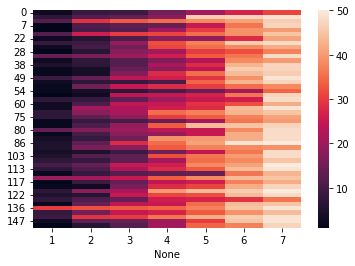

In [80]:
# Separate numbers in new df
numbers = df[['1','2','3','4','5','6','7']].sample(50).sort_index()

# create a heatmap
import seaborn as sns

hm = sns.heatmap(numbers)